<a href="https://colab.research.google.com/github/ZosoV/aco_random_walk/blob/main/notebooks/display_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display Results

In this notebook, you can find some results of our work

In [1]:
COLAB_ENV = False

if COLAB_ENV:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd /content/gdrive/MyDrive/Proyectos/aco_random_walk/
else:
    #%cd /home/zosov/ACO_Random_Walk
    %cd /home/israel.pineda/oscar/aco_random_walk/

/home/israel.pineda/oscar/aco_random_walk


In [2]:
!ls stuff/results/aco_pp

histories_params_p		   histories_params_proximity_dif_size
histories_params_penalty	   histories_params_q_0
histories_params_penalty_dif_size  random_walks
histories_params_penalty_p_0-3


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import glob
import pandas as pd

In [4]:
RESULTS_DIR = "stuff/results/aco_pp"
SAVE_DIR = "stuff/results/plots"
EXPERIMENT_FILE = "stuff/experiments/params_experiments.xlsx"

In [5]:
#@title Handy Functions    
def plot_many_distances(list_distances, legend_labels, 
                        legend_title = "var params",  title = "", 
                        save = False , name2save = "default",
                        ylim = None):

  list_iterations = np.arange(0, len(list_distances[0]))

  title = 'Average Distance vs Iterations \n' + title
  figure(figsize=(6, 5))#, dpi=80)
  plt.title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    plt.plot(list_iterations, distances, "-", label = str(label))

  plt.legend(title=legend_title)
  if ylim is not None:
    plt.ylim(ylim[0], ylim[1])
  if save: plt.savefig(os.path.join(SAVE_DIR,name2save + ".eps"), format='eps')

  plt.show()
  plt.close()
    
#@title Handy Functions    
def plot_many_distances_ax(ax, list_distances, legend_labels, 
                        legend_title = "var params",  title = "",
                        set_ylabel = None,
                        set_xlabel = None,
                        ylim = None,
                        disable_y_tick = False):

  list_iterations = np.arange(0, len(list_distances[0]))

  title = r'Average Distance $\langle x \rangle$ vs Iterations'+' \n' + title
  #figure(figsize=(6, 5))#, dpi=80)
  ax.set_title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    ax.plot(list_iterations, distances, "-", label = str(label))
  
  if set_ylabel is not None:
      ax.set_ylabel(set_ylabel, rotation=0)
  if set_xlabel is not None:
      ax.set_xlabel(set_xlabel)
  if disable_y_tick:
      ax.set_yticks([])
        
  ax.legend(title=legend_title)
  if ylim is not None:
    ax.set_ylim(ylim[0], ylim[1])

    

## Plot the variation of evaporation

In this experiment, we varied the $\rho$ parameter and proximity. 

In [14]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_p")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_1
1,50,10,1,3,2,0.5,NaN,0,0.5,0.7,proximity_1
2,50,10,1,3,2,0.7,NaN,0,0.5,0.7,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_2
4,50,10,1,3,2,0.5,NaN,0,0.5,0.7,proximity_2
5,50,10,1,3,2,0.7,NaN,0,0.5,0.7,proximity_2


In [15]:
params.columns

Index(['size', 'ants', 'tau_0', 'alpha', 'beta', 'p', 'intensity', 'local_p',
       'q_0', 'penalty', 'proximity'],
      dtype='object')

In [16]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_p")

list_distances1 = []
legend_labels1 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances1.append(np.stack(stack_list).mean(axis = 0))
    legend_labels1.append(r"$\rho$: {} {}".format(
            row["p"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title1 = "size: {} ".format(s_row['size'])
text_title1 += "ants: {} ".format(s_row['ants'])
text_title1 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title1 += r"$\beta$: {} ".format(s_row['beta'])
text_title1 += r"$q_0$: {} ".format(s_row['q_0'])
text_title1 += r"$\lambda$: {} ".format(s_row['penalty'])


legend_labels1

['$\\rho$: 0.3 proximity_1',
 '$\\rho$: 0.5 proximity_1',
 '$\\rho$: 0.7 proximity_1',
 '$\\rho$: 0.3 proximity_2',
 '$\\rho$: 0.5 proximity_2',
 '$\\rho$: 0.7 proximity_2']

In [17]:
list_distances1 = list_distances1[0:2] + list_distances1[3:5]
legend_labels1 = legend_labels1[0:2] + legend_labels1[3:5]
legend_labels1

['$\\rho$: 0.3 proximity_1',
 '$\\rho$: 0.5 proximity_1',
 '$\\rho$: 0.3 proximity_2',
 '$\\rho$: 0.5 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 116.85999999999999
min dist: 120.24666666666666
min dist: 115.67333333333337
min dist: 120.90666666666661


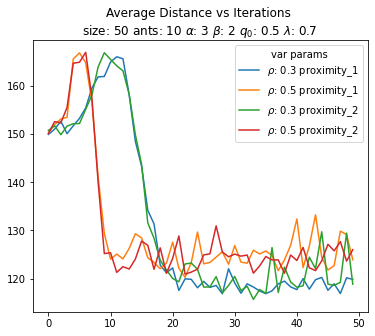

In [18]:
plot_many_distances(list_distances1, legend_labels1,  title = text_title1, save = True, name2save = "params_p") #, ylim = (100,350))

## Plot the variation of $q_0$

In this experiment, we varied the $q_0$ parameter and proximity. 

In [19]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_q_0")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.3,0.7,proximity_1
1,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_1
2,50,10,1,3,2,0.3,NaN,0,0.7,0.7,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.3,0.7,proximity_2
4,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_2
5,50,10,1,3,2,0.3,NaN,0,0.7,0.7,proximity_2


In [20]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_q_0")

list_distances2 = []
legend_labels2 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances2.append(np.stack(stack_list).mean(axis = 0))
    legend_labels2.append(r"$q_0$: {} {}".format(
            row["q_0"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title2 = "size: {} ".format(s_row['size'])
text_title2 += "ants: {} ".format(s_row['ants'])
text_title2 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title2 += r"$\beta$: {} ".format(s_row['beta'])
text_title2 += r"$\rho$: {} ".format(s_row['p'])
text_title2 += r"$\lambda$: {} ".format(s_row['penalty'])


legend_labels2

['$q_0$: 0.3 proximity_1',
 '$q_0$: 0.5 proximity_1',
 '$q_0$: 0.7 proximity_1',
 '$q_0$: 0.3 proximity_2',
 '$q_0$: 0.5 proximity_2',
 '$q_0$: 0.7 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 143.31333333333333
min dist: 115.1266666666667
min dist: 103.97999999999999
min dist: 141.60000000000002
min dist: 117.05333333333331
min dist: 103.56666666666668


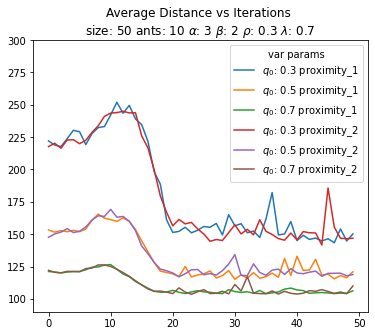

In [21]:
plot_many_distances(list_distances2, legend_labels2,  title = text_title2, ylim=(90,300), save = True, name2save = "params_q_0")

## Plot the variation of penalty

In this experiment, we varied the $\lambda$ parameter and proximity. 

In [42]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_penalty")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.5,NaN,0,0.7,0.3,proximity_1
1,50,10,1,3,2,0.5,NaN,0,0.7,0.5,proximity_1
2,50,10,1,3,2,0.5,NaN,0,0.7,0.7,proximity_1
3,50,10,1,3,2,0.5,NaN,0,0.7,0.3,proximity_2
4,50,10,1,3,2,0.5,NaN,0,0.7,0.5,proximity_2
5,50,10,1,3,2,0.5,NaN,0,0.7,0.7,proximity_2


In [47]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_penalty")

list_distances3 = []
legend_labels3 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances3.append(np.stack(stack_list).mean(axis = 0))
    legend_labels3.append(r"$\lambda$: {} {}".format(
            row["penalty"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title3 = "size: {} ".format(s_row['size'])
text_title3 += "ants: {} ".format(s_row['ants'])
text_title3 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title3 += r"$\beta$: {} ".format(s_row['beta'])
text_title3 += r"$\rho$: {} ".format(s_row['p'])
text_title3 += r"$q_0$: {} ".format(s_row['q_0'])


legend_labels3

['$\\lambda$: 0.3 proximity_1',
 '$\\lambda$: 0.5 proximity_1',
 '$\\lambda$: 0.7 proximity_1',
 '$\\lambda$: 0.3 proximity_2',
 '$\\lambda$: 0.5 proximity_2',
 '$\\lambda$: 0.7 proximity_2']

In [45]:
list_distances3 = list_distances3[0:5]
legend_labels3 = legend_labels3[0:5]
legend_labels3

['$\\lambda$: 0.3 proximity_1',
 '$\\lambda$: 0.5 proximity_1',
 '$\\lambda$: 0.7 proximity_1',
 '$\\lambda$: 0.3 proximity_2',
 '$\\lambda$: 0.5 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 127.37333333333335
min dist: 116.48000000000002
min dist: 105.89999999999996
min dist: 127.45333333333333
min dist: 115.44666666666667
min dist: 105.73333333333332


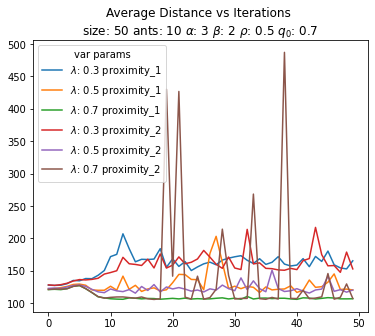

In [48]:
plot_many_distances(list_distances3, legend_labels3,  title = text_title3, save = True, name2save = "params_penalty")

In [8]:
exp_name = "params_penalty_p_0-3"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=exp_name)
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.7,0.40,proximity_1
1,50,10,1,3,2,0.3,NaN,0,0.7,0.55,proximity_1
2,50,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.7,0.40,proximity_2
4,50,10,1,3,2,0.3,NaN,0,0.7,0.55,proximity_2
5,50,10,1,3,2,0.3,NaN,0,0.7,0.70,proximity_2


In [11]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, f"histories_{exp_name}")

list_distances3 = []
legend_labels3 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances3.append(np.stack(stack_list).mean(axis = 0))
    legend_labels3.append(r"$\lambda$: {:.2f} {}".format(
            row["penalty"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title3 = "size: {} ".format(s_row['size'])
text_title3 += "ants: {} ".format(s_row['ants'])
text_title3 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title3 += r"$\beta$: {} ".format(s_row['beta'])
text_title3 += r"$\rho$: {} ".format(s_row['p'])
text_title3 += r"$q_0$: {} ".format(s_row['q_0'])


legend_labels3

['$\\lambda$: 0.40 proximity_1',
 '$\\lambda$: 0.55 proximity_1',
 '$\\lambda$: 0.75 proximity_1',
 '$\\lambda$: 0.40 proximity_2',
 '$\\lambda$: 0.55 proximity_2',
 '$\\lambda$: 0.70 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 123.88666666666668
min dist: 111.98000000000002
min dist: 102.79333333333334
min dist: 124.14
min dist: 111.51333333333334
min dist: 103.76666666666665


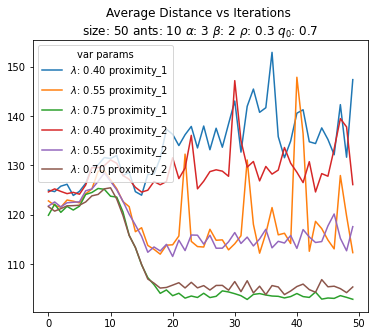

In [12]:
plot_many_distances(list_distances3, legend_labels3,  title = text_title3, save = True, name2save = "params_penalty")

min dist: 116.85999999999999
min dist: 120.24666666666666
min dist: 115.67333333333337
min dist: 120.90666666666661
min dist: 143.31333333333333
min dist: 115.1266666666667
min dist: 103.97999999999999
min dist: 141.60000000000002
min dist: 117.05333333333331
min dist: 103.56666666666668
min dist: 123.88666666666668
min dist: 111.98000000000002
min dist: 102.79333333333334
min dist: 124.14
min dist: 111.51333333333334
min dist: 103.76666666666665


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


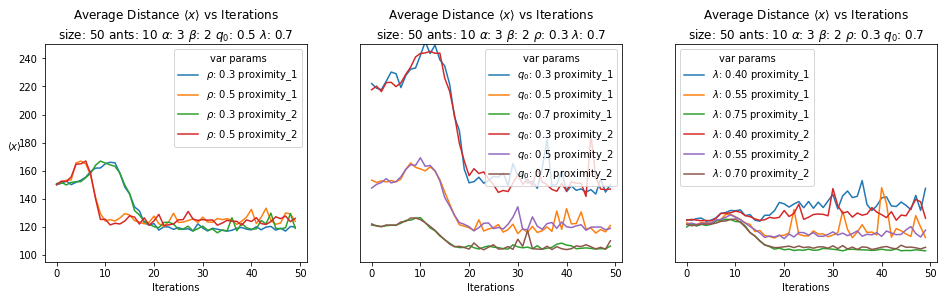

In [22]:

fig, ax = plt.subplots(figsize=(16,4))#, dpi=50)

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
y_lim = (95, 250)

plot_many_distances_ax(ax1,list_distances1[0:4], legend_labels1[0:4],  title = text_title1, ylim = y_lim, set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations")
plot_many_distances_ax(ax2,list_distances2, legend_labels2,  title = text_title2, ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = True)
plot_many_distances_ax(ax3,list_distances3, legend_labels3,  title = text_title3,  ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = True)

plt.savefig(os.path.join(SAVE_DIR,"params_selection" + ".eps"), bbox_inches='tight', format='eps')